In [1]:
# Linear Regression: Tensorflow Way
# ----------------------------------
#
# This function shows how to use Tensorflow to
# solve linear regression.
# y = Ax + b
#
# We will use the iris data, specifically:
#  y = Sepal Length
#  x = Petal Width

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

ops.reset_default_graph()

# Create graph
sess = tf.Session()

In [3]:
# Load the data
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])
# print("iris:", iris)
print("x_vals:", x_vals)
print("y_vals:", y_vals)

x_vals: [ 0.2  0.2  0.2  0.2  0.2  0.4  0.3  0.2  0.2  0.1  0.2  0.2  0.1  0.1  0.2
  0.4  0.4  0.3  0.3  0.3  0.2  0.4  0.2  0.5  0.2  0.2  0.4  0.2  0.2  0.2
  0.2  0.4  0.1  0.2  0.1  0.2  0.2  0.1  0.2  0.2  0.3  0.3  0.2  0.6  0.4
  0.3  0.2  0.2  0.2  0.2  1.4  1.5  1.5  1.3  1.5  1.3  1.6  1.   1.3  1.4
  1.   1.5  1.   1.4  1.3  1.4  1.5  1.   1.5  1.1  1.8  1.3  1.5  1.2  1.3
  1.4  1.4  1.7  1.5  1.   1.1  1.   1.2  1.6  1.5  1.6  1.5  1.3  1.3  1.3
  1.2  1.4  1.2  1.   1.3  1.2  1.3  1.3  1.1  1.3  2.5  1.9  2.1  1.8  2.2
  2.1  1.7  1.8  1.8  2.5  2.   1.9  2.1  2.   2.4  2.3  1.8  2.2  2.3  1.5
  2.3  2.   2.   1.8  2.1  1.8  1.8  1.8  2.1  1.6  1.9  2.   2.2  1.5  1.4
  2.3  2.4  1.8  1.8  2.1  2.4  2.3  1.9  2.3  2.5  2.3  1.9  2.   2.3  1.8]
y_vals: [ 5.1  4.9  4.7  4.6  5.   5.4  4.6  5.   4.4  4.9  5.4  4.8  4.8  4.3  5.8
  5.7  5.4  5.1  5.7  5.1  5.4  5.1  4.6  5.1  4.8  5.   5.   5.2  5.2  4.7
  4.8  5.4  5.2  5.5  4.9  5.   5.5  4.9  4.4  5.1  5.   4.5  4.4  5.  

In [26]:
# Declare batch size
batch_size = 25
# Initialize placeholders
x_data = tf.placeholder(shape=[None,1],dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1],dtype=tf.float32)
print(x_data,y_target)
# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))
# Declare model operations
model_output = tf.add(tf.matmul(x_data,A),b)
# Declare loss function (L2 loss)
loss = tf.reduce_mean(tf.square(y_target-model_output))
# help(tf.reduce_mean)
# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(loss)
# print(train_step)
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

Tensor("Placeholder_22:0", shape=(?, 1), dtype=float32) Tensor("Placeholder_23:0", shape=(?, 1), dtype=float32)


step # 25A=[[ 2.21933722]]b=[[ 2.79508305]]
Loss = 1.20498
step # 50A=[[ 1.64833355]]b=[[ 3.60414457]]
Loss = 0.625396
step # 75A=[[ 1.3468461]]b=[[ 4.06687498]]
Loss = 0.194978
step # 100A=[[ 1.19807637]]b=[[ 4.36924553]]
Loss = 0.278504


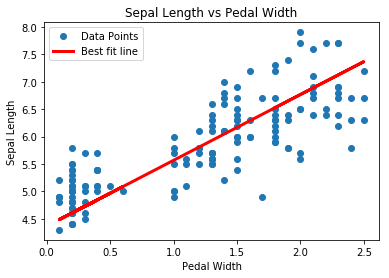

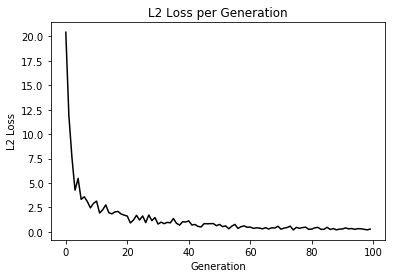

In [20]:
# Training loop
loss_vec = []
for i in range(100):
    rand_index = np.random.choice(len(x_vals),size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1) % 25 == 0:
        print("step # " + str(i+1)+"A=" + str(sess.run(A)) + "b=" + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))
            
# Get the optimal coefficients
[slope] = sess.run(A)
[y_intercept] = sess.run(b)           
# Get best fit line
best_fit = []
for i in x_vals:
    best_fit.append(slope * i + y_intercept)

# Plot the result
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()  